# ENTENDENDO O PROBLEMA

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Problema:**
Uma empresa de telecomunicações deseja melhorar a retenção de clientes, reduzindo o número de cancelamentos de contrato. Eles querem entender quais são as principais razões pelas quais os clientes cancelam seus contratos e como eles podem identificar os clientes que estão em risco de cancelar.

**Informações do dataset:**

| Coluna | Descrição |
|--------|-----------|
| customerID | ID exclusivo de cada cliente |
| gender | Gênero do cliente (Masculino ou Feminino) |
| SeniorCitizen | Indica se o cliente é idoso (1) ou não (0) |
| Partner | Indica se o cliente tem um parceiro (Sim ou Não) |
| Dependents | Indica se o cliente tem dependentes (Sim ou Não) |
| tenure | Número de meses que o cliente permaneceu com a empresa |
| PhoneService | Indica se o cliente tem serviço de telefone (Sim ou Não) |
| MultipleLines | Indica se o cliente tem várias linhas telefônicas (Sim, Não ou Sem serviço telefônico) |
| InternetService | Tipo de serviço de internet do cliente (DSL, Fibra Óptica ou Sem serviço de internet) |
| OnlineSecurity | Indica se o cliente tem segurança online (Sim, Não ou Sem serviço de internet) |
| OnlineBackup | Indica se o cliente tem backup online (Sim, Não ou Sem serviço de internet) |
| DeviceProtection | Indica se o cliente tem proteção de dispositivo (Sim, Não ou Sem serviço de internet) |
| TechSupport | Indica se o cliente tem suporte técnico (Sim, Não ou Sem serviço de internet) |
| StreamingTV | Indica se o cliente tem serviço de TV por streaming (Sim, Não ou Sem serviço de internet) |
| StreamingMovies | Indica se o cliente tem serviço de filmes por streaming (Sim, Não ou Sem serviço de internet) |
| Contract | Tipo de contrato do cliente (Mensal, Dois anos ou Um ano) |
| PaperlessBilling | Indica se o cliente optou pela fatura eletrônica (Sim ou Não) |
| PaymentMethod | Método de pagamento do cliente (Cheque Eletrônico, Cartão de Crédito, Transferência Bancária (automática) ou Pagamento Eletrônico) |
| MonthlyCharges | Valor mensal cobrado do cliente |
| TotalCharges | Valor total cobrado do cliente |
| Churn | Indica se o cliente cancelou o contrato (Sim ou Não) |


# IMPORTS

In [180]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import warnings 

from scipy                 import stats  as ss

from matplotlib            import pyplot as plt
from IPython.core.display  import HTML

warnings.filterwarnings( 'ignore' )

## Helper Functions

In [313]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    
    sns.set()
jupyter_settings()

def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [182]:
df = pd.read_csv('../data/telco-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# DATA DESCRIPTIONS

In [359]:
df2 = df.copy()

## Rename Columns

In [360]:
df2.columns = df2.columns.str.lower()

## Change Types


In [361]:
df2['totalcharges'] = df2['totalcharges'].apply(lambda x: '0' if x == ' ' else x)
df2['totalcharges'] = df2['totalcharges'].astype(float)

df2.drop(columns=['customerid'], inplace=True)

df2['seniorcitizen'] = df2['seniorcitizen'].astype(uint8)

# varaivel reposta para 0 e 1.
df2['churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['churn'].replace(to_replace='No',  value=0, inplace=True)

# convetar o dataset para dummies
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Data Dimensions

In [362]:
print(f'number of rows: {df2.shape[0]}')
print(f'number of columns: {df2.shape[1]}')

number of rows: 7043
number of columns: 20


## Data Types

In [363]:
df2.dtypes

gender               object
seniorcitizen         uint8
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

## Check NA

In [364]:
df2.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## Descriptive Statistical

In [365]:
num_attrs = df2.select_dtypes(include=['int64', 'int32',  'float64'])
cat_attrs = df2.select_dtypes(exclude=['int32', 'int64', 'float64', 'datetime64[ns]'])

## Numerical Attributes

In [366]:
# central tendency - mean, media
ct1 = pd.DataFrame(num_attrs.apply(np.mean)).T
ct2 = pd.DataFrame(num_attrs.apply(np.median)).T

# disperation - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attrs.apply(np.std)).T
d2 = pd.DataFrame(num_attrs.apply(min)).T
d3 = pd.DataFrame(num_attrs.apply(max)).T
d4 = pd.DataFrame(num_attrs.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attrs.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attrs.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2,d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attrs', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attrs,min,max,range,mean,median,std,skew,kurtosis
0,tenure,0.00,72.00,72.0,32.371149,29.00,24.557737,0.239540,-1.387372
1,monthlycharges,18.25,118.75,100.5,64.761692,70.35,30.087911,-0.220524,-1.257260
2,totalcharges,0.00,8684.80,8684.8,2279.734304,1394.55,2266.633539,0.963235,-0.228580
3,churn,0.00,1.00,1.0,0.265370,0.00,0.441530,1.063031,-0.870211


Minha variavel "tenure" está com um desvio padrão de 24, isso indica que meus dados estão muito espalhado em relação a minha média de 32. O desvio padrão está me indicando que meus dados não estão previsiveis e isso pode me atrapalhar na hora de prever ou tirar insights. Porém, isso me indica que alguns clientes permanecem por mais tempo e outros cancelam rapidamente.

# DATA ANALYSIS

In [434]:
df3 = df2.copy()

## Univariate Analysis


### Variavel Resposta

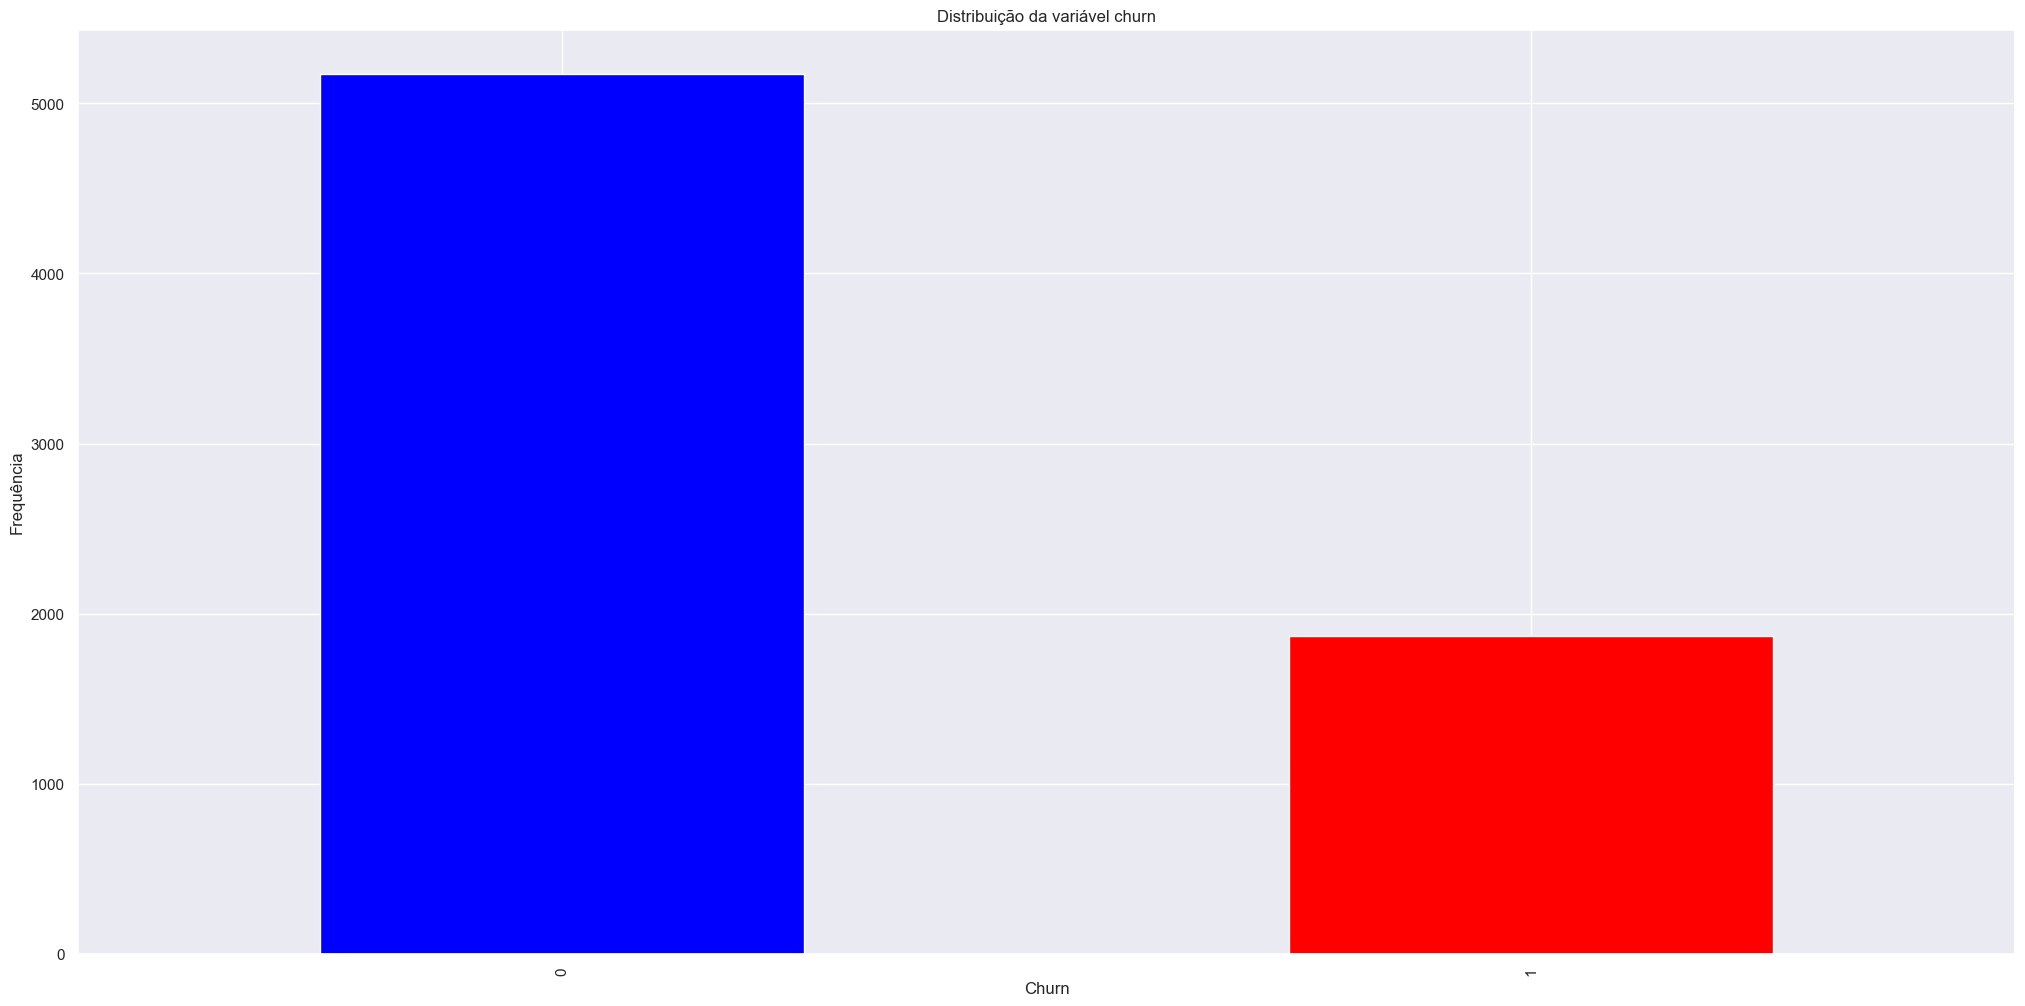

In [493]:
freq_table = df3['churn'].value_counts()

freq_table.plot(kind='bar', color=['blue', 'red']);
plt.title('Distribuição da variável churn')
plt.xlabel('Churn')
plt.ylabel('Frequência');


### Dados Demograficos

In [436]:
dados_demograficos = df3[['gender', 'seniorcitizen', 'partner', 'dependents']]
dados_demograficos

,gender,seniorcitizen,partner,dependents
0,Female,0,Yes,No
1,Male,0,No,No
2,Male,0,No,No
3,Male,0,No,No
4,Female,0,No,No
...,...,...,...,...
7038,Male,0,Yes,Yes
7039,Female,0,Yes,Yes
7040,Female,0,Yes,Yes
7041,Male,1,Yes,No


Male      50.47565
Female    49.52435


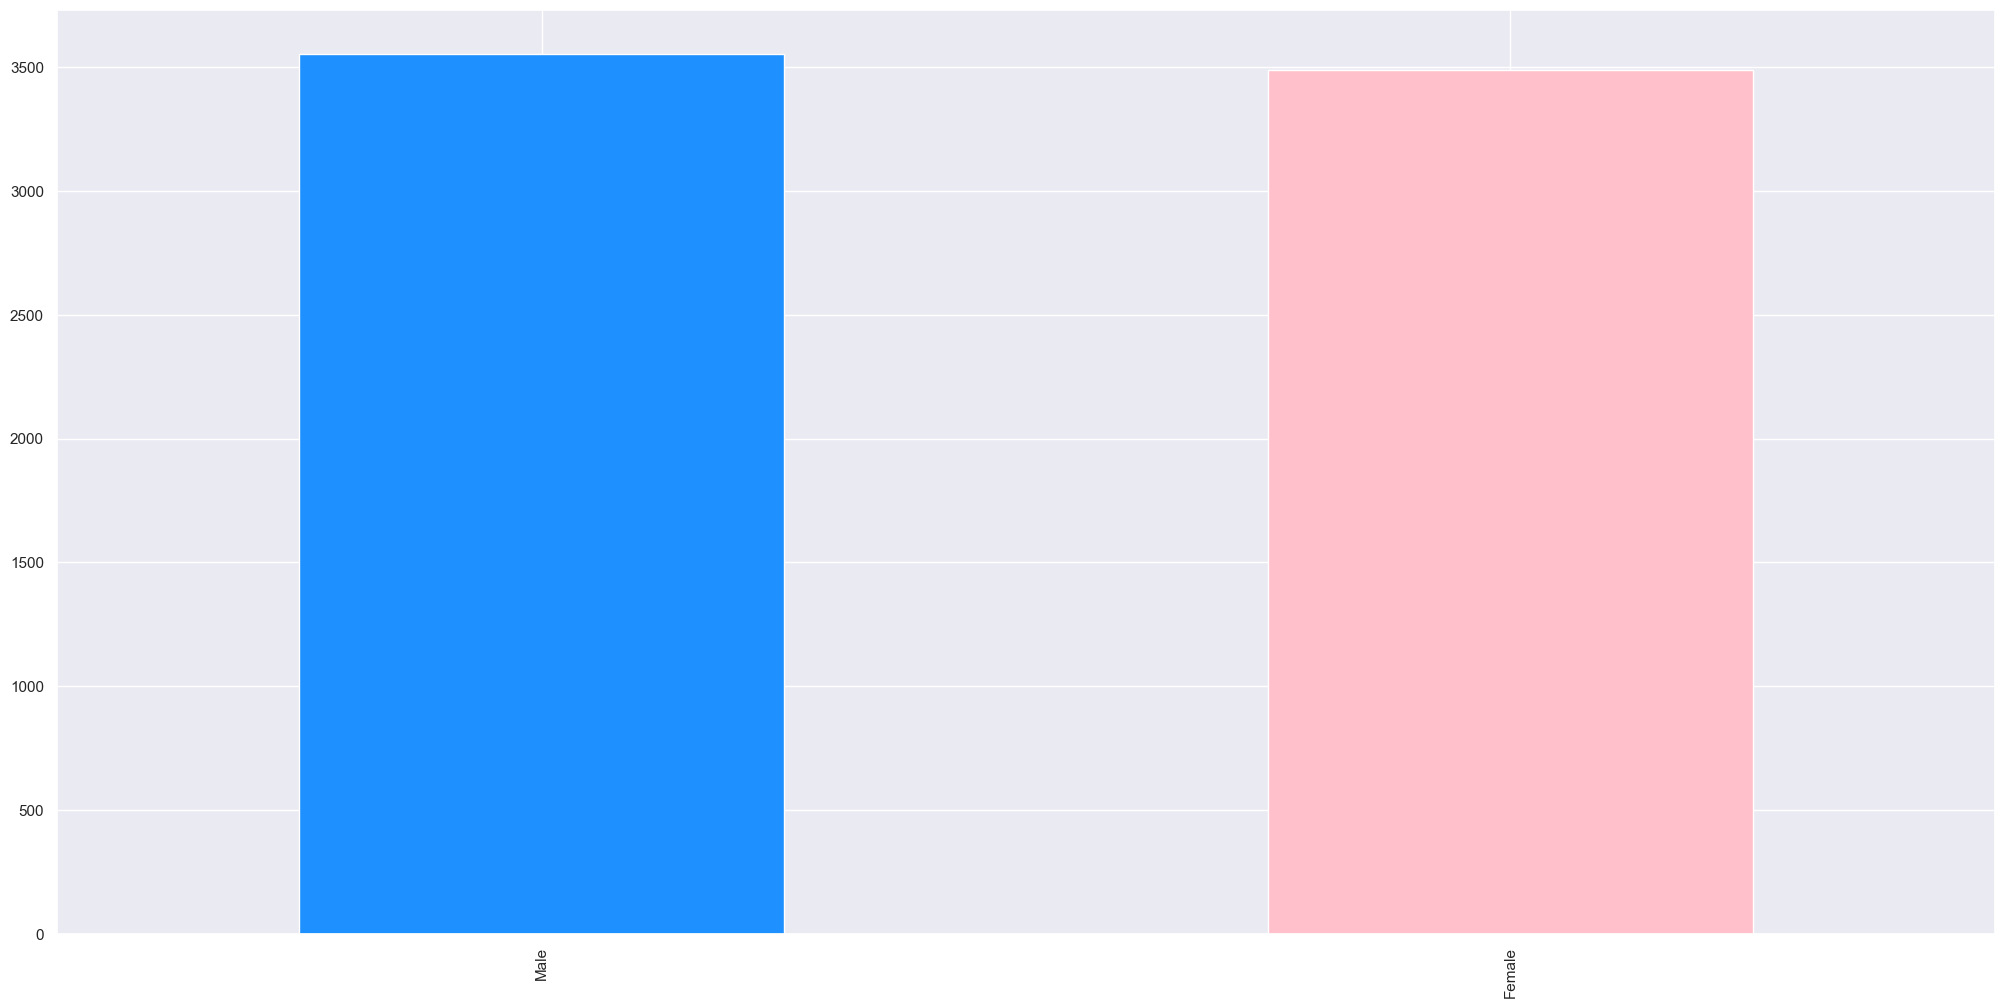

In [513]:
print((dados_demograficos['gender'].value_counts(normalize=True) * 100).to_string())
dados_demograficos['gender'].value_counts().plot(kind='bar', color=['dodgerblue', 'pink']); 

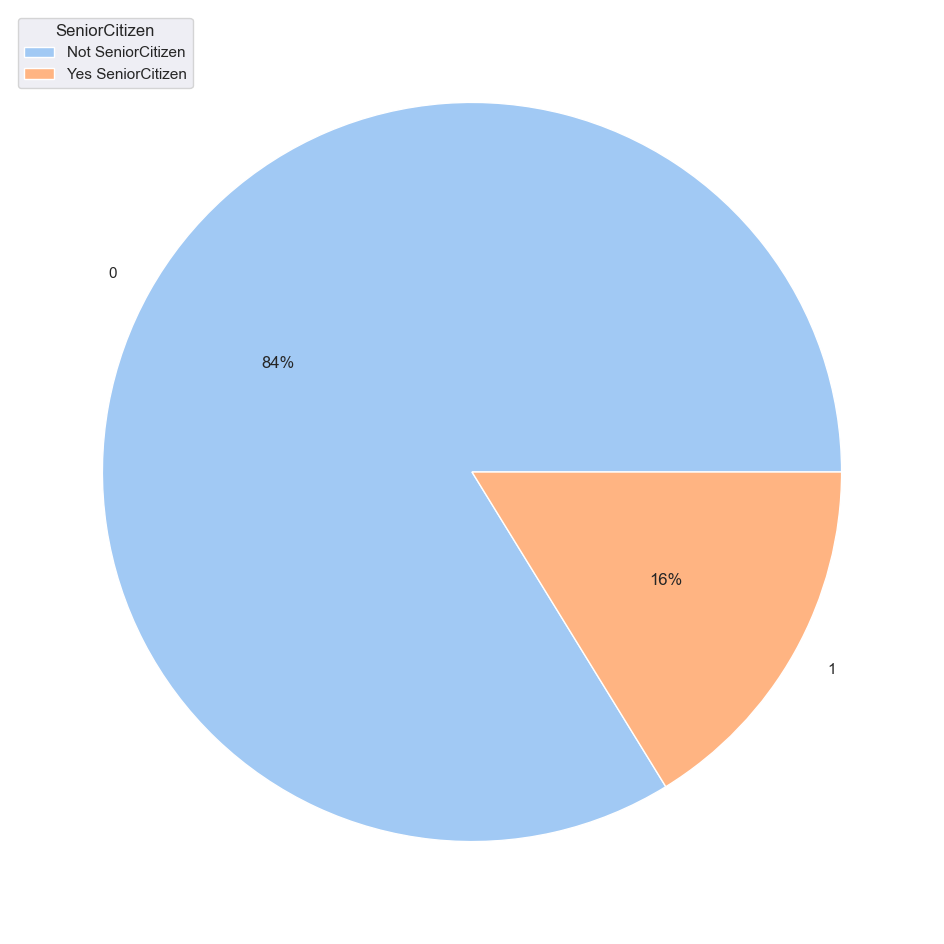

In [487]:
keys = dados_demograficos['seniorcitizen'].value_counts(normalize=True).index
data = dados_demograficos['seniorcitizen'].value_counts(normalize=True).values

palette_color = sns.color_palette('pastel')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%');
plt.legend(title='SeniorCitizen', loc='upper left', labels=['Not SeniorCitizen', 'Yes SeniorCitizen']);

In [514]:
dados_demograficos['partner'].value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: partner, dtype: float64

In [515]:
dados_demograficos['dependents'].value_counts(normalize=True)

No     0.700412
Yes    0.299588
Name: dependents, dtype: float64

### Dados de serviços

In [373]:
servicos = df3[['phoneservice','multiplelines','internetservice','onlinesecurity',
           'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']]

### Informações dos usuarios

In [403]:
informacos_dos_usuarios = df3.loc[:, ~df3.columns.isin(dados_demograficos.columns.tolist() + servicos.columns.tolist())]

## Bivariate Analysis


In [354]:
df3.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Multivariate Analysis


### Numerical

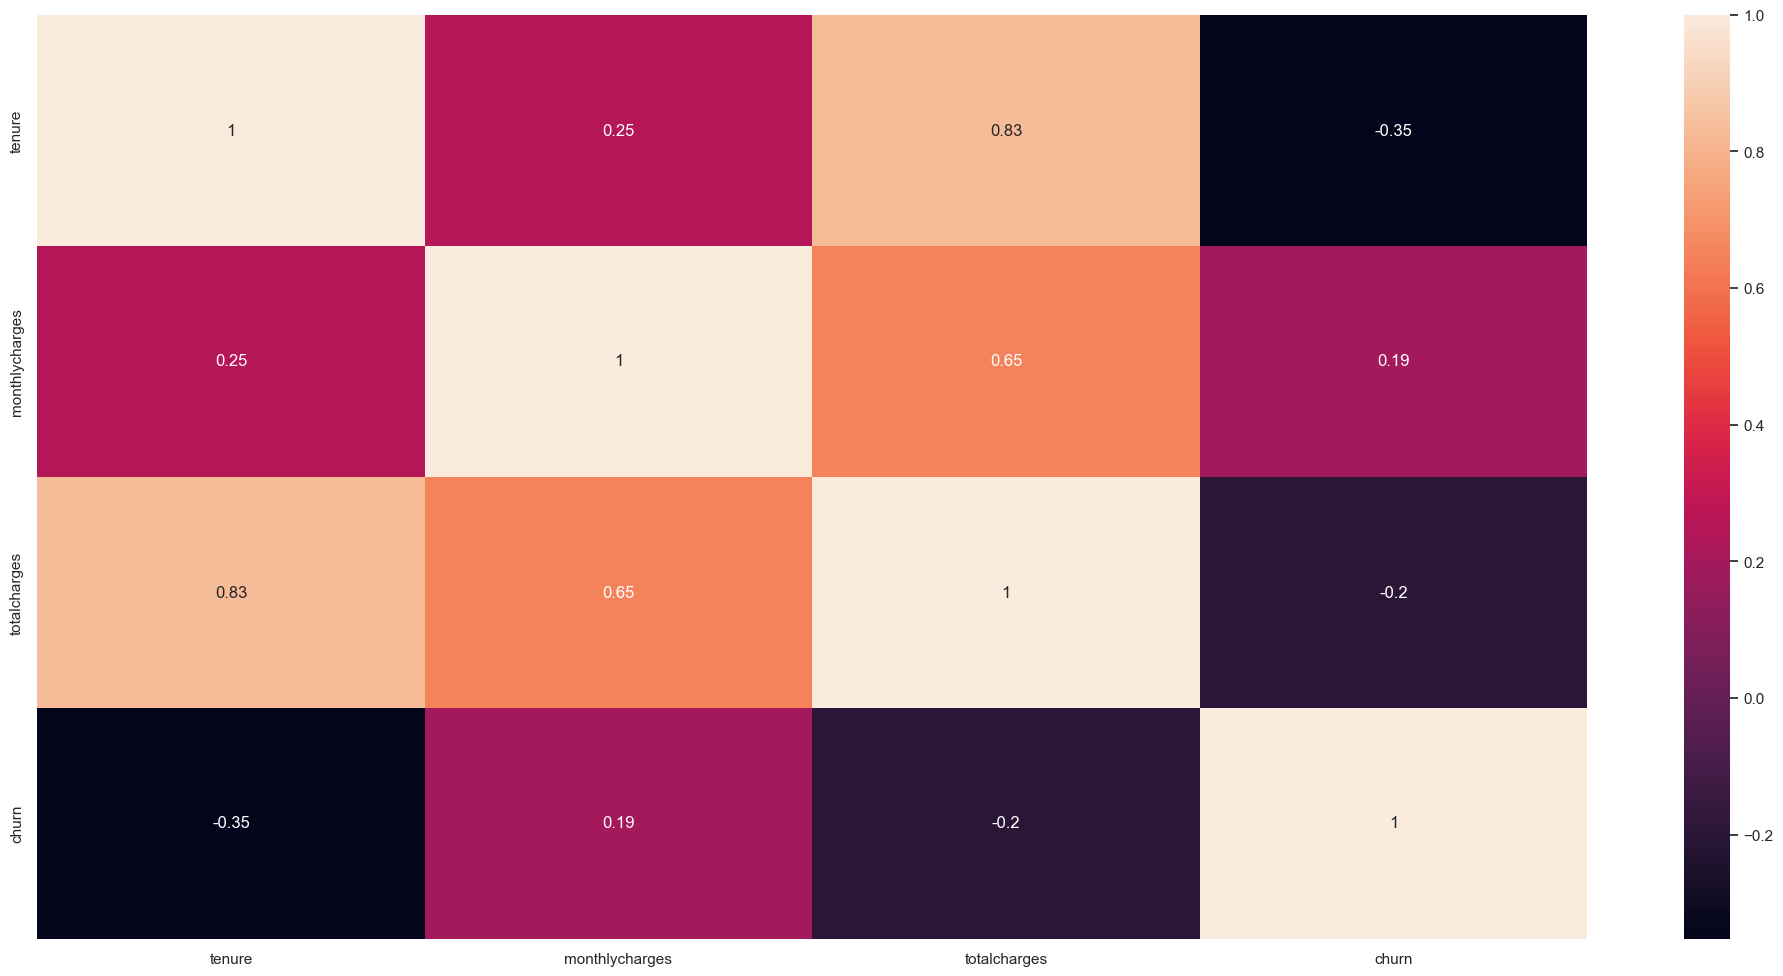

In [355]:
correlation = num_attrs.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

### Categorical

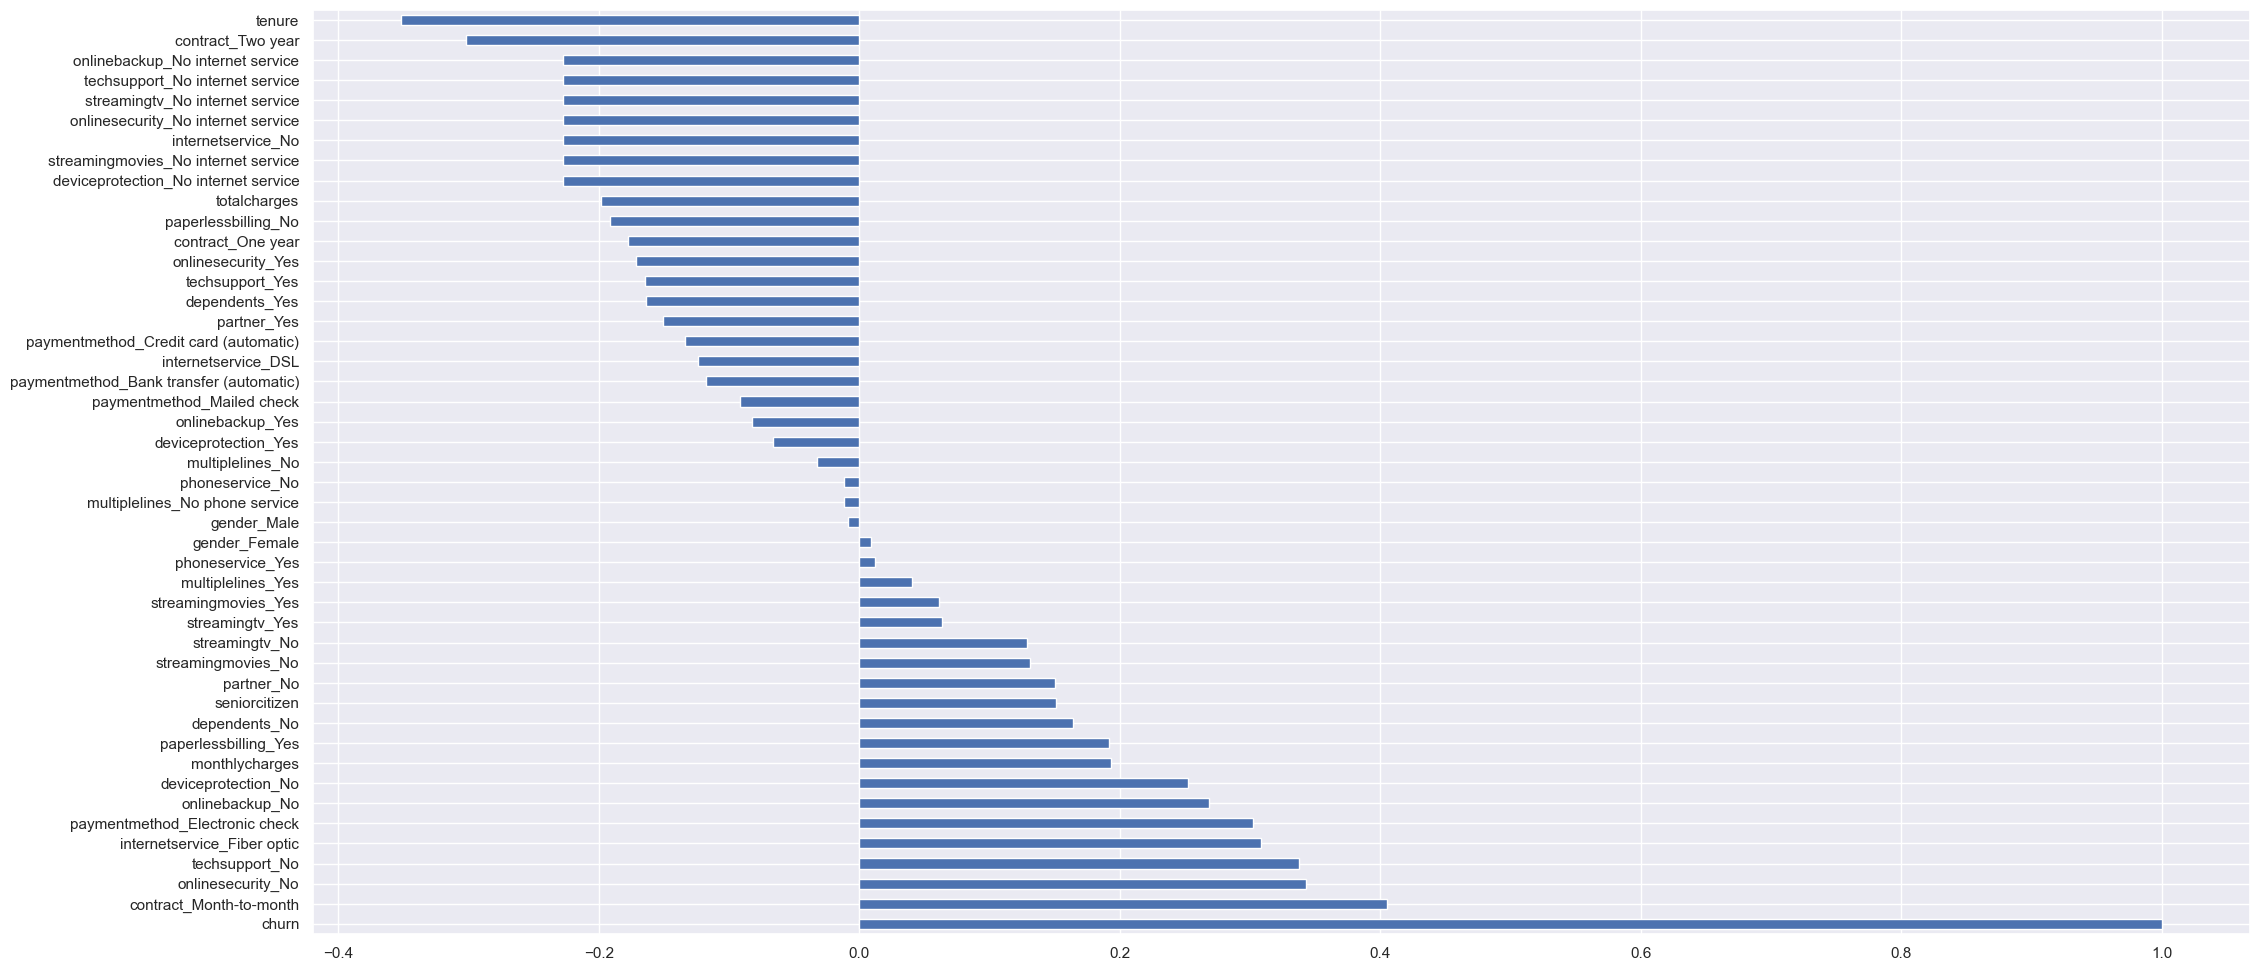

In [356]:
#plt.figure(figsize=(15, 10))
df2.corr()['churn'].sort_values(ascending=False).plot(kind='barh'); 

Então, parece que contrato mes a mes tem uma correlação alta com Churn, mas não é somente a variavel contrato, tem mais 13 variaveis que tem correlação.

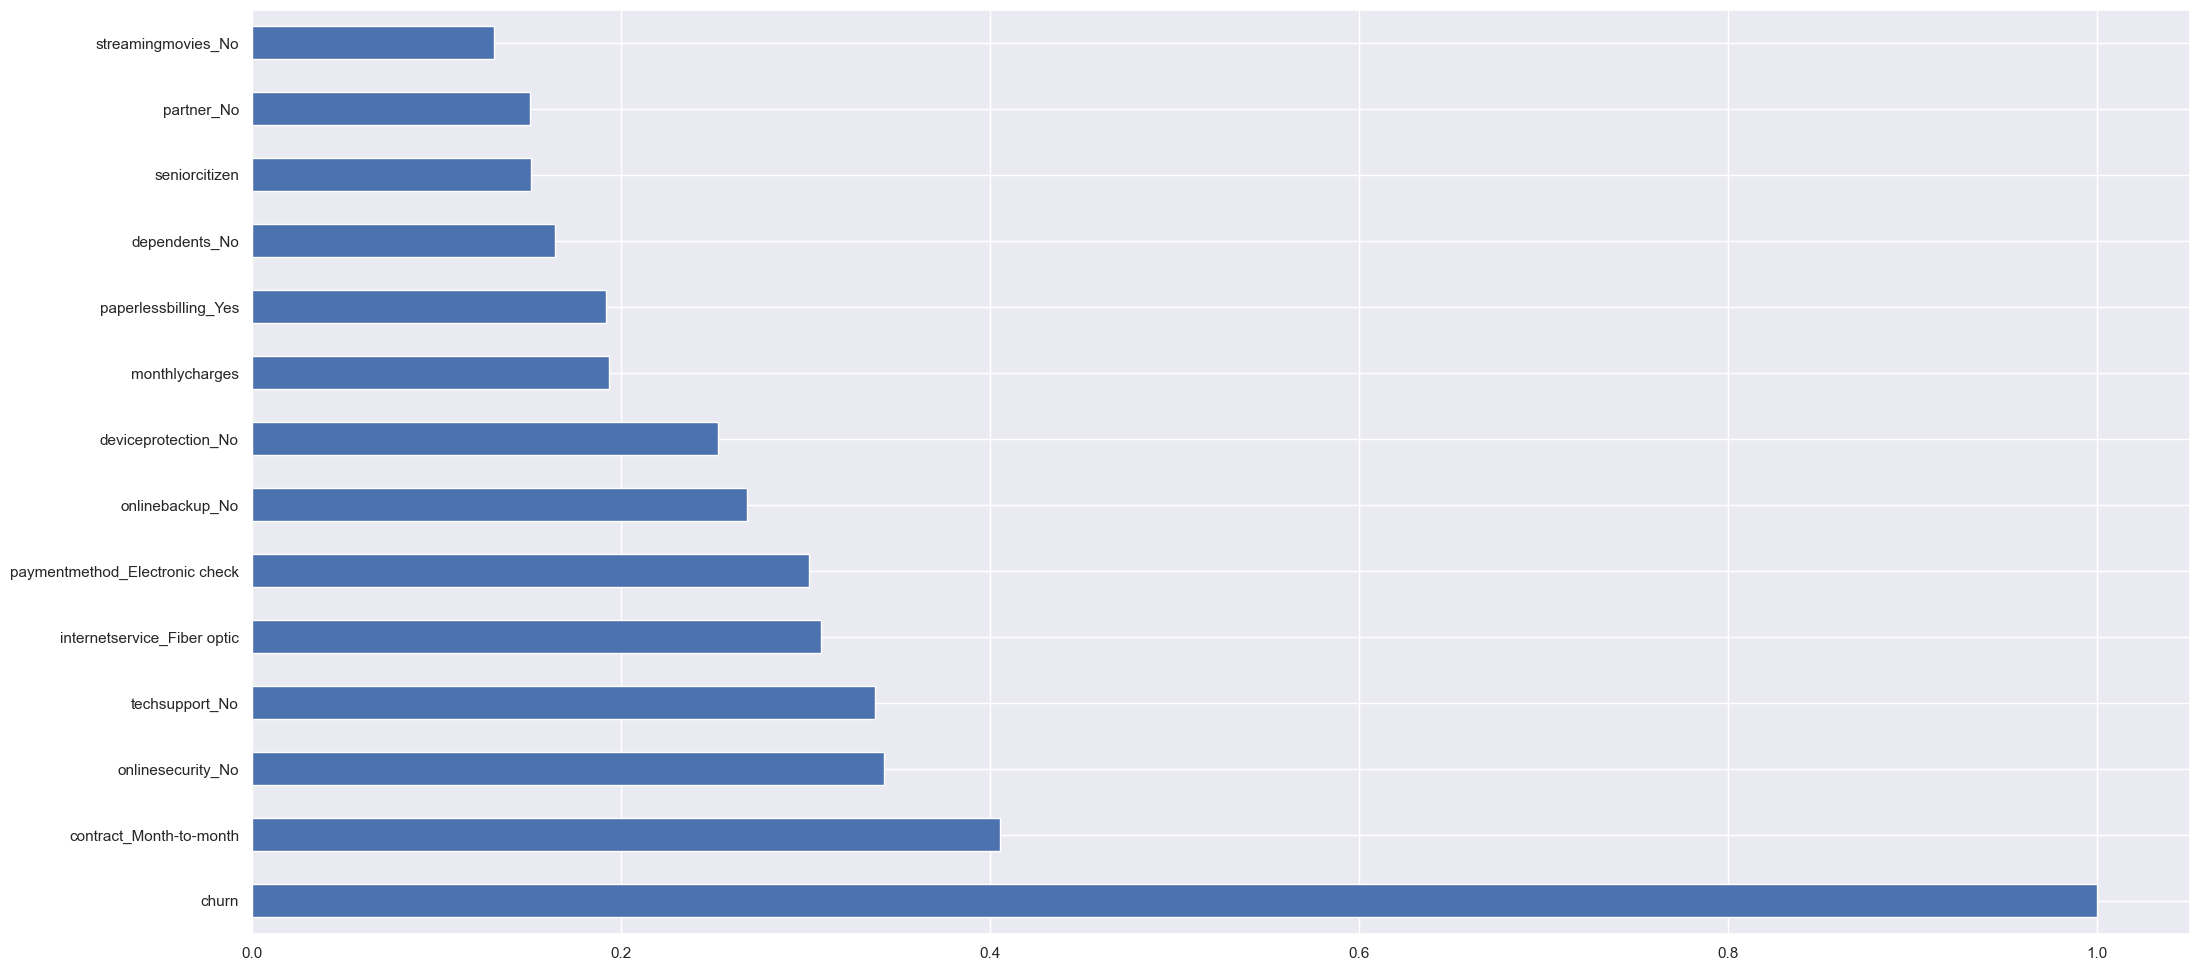

In [357]:
df2.corr()['churn'].sort_values(ascending=False)[:14].plot(kind='barh'); 

Filtrei as variaveis que eu acho mais importante